# Test Notebook

## Import and reformat data from GraphiteDB

In [3]:
from datetime import datetime
import pandas as pd
import requests as rq
%matplotlib inline
import matplotlib.pyplot as pyplot

json = rq.get('http://graphs.commonjava.org:8000/render?target=house.fping.8_8_8_8.*&format=json&from=-36h').json()

data = {'time': [tstamp for (_,tstamp) in json[0]['datapoints']]}
count=0
for series in json:
    name = series['target'].split('.')[-1]
    for val,_ in series['datapoints']:
        if data.get(name) is None:
            data[name] = []
        
        data[name].append(val)

cols = ['time','avg','loss']
for key in list(data.keys()):
    if key not in cols:
        del data[key]

df = pd.DataFrame(data, columns=['time', 'avg', 'loss'])
df['time'] = pd.to_datetime(df['time'], unit='s')
df.index=df['time']
del df['time']

## Plot

Text(0, 0.5, 'ms')

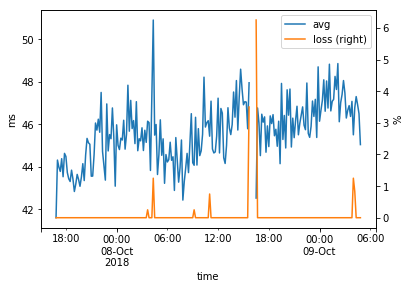

In [4]:
ax = df.resample('10min').mean().plot(secondary_y=['loss'])
ax.right_ax.set_ylabel('%')
ax.set_ylabel('ms')


In [5]:
from pivottablejs import pivot_ui
pivot_ui(df)